In [169]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.utils import shuffle
%matplotlib inline

In [112]:
x = torch.arange(-100, 100, 0.1).view(-1, 1)
y = torch.sigmoid(x)

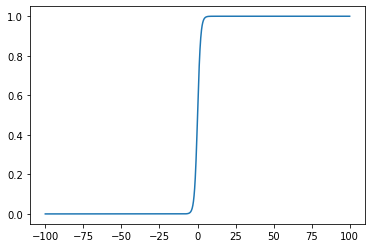

In [113]:
plt.plot(x.numpy(), y.numpy());

In [171]:
def load_data():
    data = load_breast_cancer()
    
    # get the features
    x = data.data
    y = data.target
    
    x, y = shuffle(x, y)
    
    # normalize the features
    x = (x - np.mean(x))/np.std(x)
    
    
    # convert e'm into numpy
    x = torch.from_numpy(x)
    y = torch.from_numpy(y)
    
    # change the type
    x = x.type(torch.float32)
    y = y.type(torch.float32)
    
    # reshape
    y = y.view(-1, 1)
    
    return x, y

In [174]:
x, y = load_data()

In [175]:
print(x.shape, y.shape)

torch.Size([569, 30]) torch.Size([569, 1])


In [176]:
def forward(x):
    return torch.sigmoid(x@w + b)

In [177]:
def criterion(yhat,y):
    out = -1 * torch.mean(y * torch.log(yhat) + (1 - y) * torch.log(1 - yhat))
    return out

In [178]:
# initialie the weights and bias
w = torch.randn((x.size()[1], 1), requires_grad=True)
b = torch.randn(1, requires_grad=True)

In [182]:
lr = 0.3
epochs = 20000
Loss = []
for epoch in range(epochs):
    yhat = forward(x)
    loss = criterian(yhat, y)
    loss.backward()
    with torch.no_grad():
        w -= lr*w.grad
        b -= lr*b.grad    
        w.grad.zero_()
        b.grad.zero_()
    Loss.append(loss.item())
    
    if epoch%(epochs//5)==0: # I want to see the 5 only
        print(f'epoch {epoch}  loss {Loss[-1]}')

epoch 0  loss 0.1422208994626999
epoch 4000  loss 0.1400221437215805
epoch 8000  loss 0.13803468644618988
epoch 12000  loss 0.13623055815696716
epoch 16000  loss 0.1345863938331604


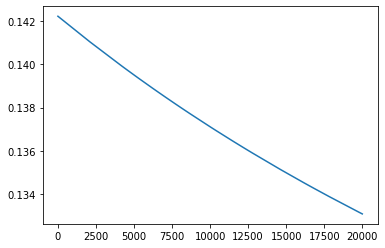

In [183]:
plt.plot(Loss)

In [184]:
# Make the Prediction
yhat = forward(x)
label = yhat > 0.5
print("The accuracy: ", torch.mean((label == y.type(torch.ByteTensor)).type(torch.float)))

The accuracy:  tensor(0.9473)


In [70]:
Loss[0]

0.6274164915084839

In [15]:
x.shape

torch.Size([569, 30])

In [162]:
model = nn.Sequential(nn.Linear(30, 1), nn.Sigmoid())

In [163]:
print(model.state_dict())

OrderedDict([('0.weight', tensor([[ 0.0508,  0.0486, -0.0507,  0.0524,  0.0432, -0.1778, -0.0858,  0.0911,
         -0.1265, -0.0648,  0.1062,  0.0937, -0.1413,  0.0811, -0.1320,  0.1600,
         -0.0187,  0.0249,  0.0529, -0.1404,  0.1302, -0.1208, -0.1629,  0.0344,
          0.0516,  0.1316, -0.1491, -0.0375,  0.1429,  0.0977]])), ('0.bias', tensor([-0.1504]))])


In [164]:
criterian = nn.BCELoss()
opt = torch.optim.SGD(model.parameters(), lr=0.01)

In [166]:
epochs = 10000
Loss = []
for epoch in range(epochs):
    yhat = model(x)
    loss = criterian(yhat, y)
    opt.zero_grad()
    loss.backward()
    opt.step()
    Loss.append(loss.item())
    if epoch%(epochs//10)==0:
        print(f'Epoch {epoch} | Loss {Loss[-1]}')
        

Epoch 0 | Loss 0.7410566210746765
Epoch 1000 | Loss 0.32930266857147217
Epoch 2000 | Loss 0.26770928502082825
Epoch 3000 | Loss 0.24215111136436462
Epoch 4000 | Loss 0.22780409455299377
Epoch 5000 | Loss 0.21845538914203644
Epoch 6000 | Loss 0.21179281175136566
Epoch 7000 | Loss 0.20675058662891388
Epoch 8000 | Loss 0.2027667760848999
Epoch 9000 | Loss 0.19951558113098145


In [167]:
# Make the Prediction
yhat = model(x)
label = yhat > 0.5
print("The accuracy: ", torch.mean((label == y.type(torch.ByteTensor)).type(torch.float)))

The accuracy:  tensor(0.9227)


In [217]:
class Data(Dataset):
    
    def __init__(self):
        self.x, self.y = load_data()
        self.len = self.x.shape[0]
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len
        

In [218]:
class  LRC(nn.Module):
    
    def __init__(self):
        super(LRC, self).__init__()
        self.model = nn.Sequential(nn.Linear(in_features=30, out_features=1), nn.Sigmoid())
        
    def forward(self, x):
        return self.model(x)

In [219]:
dataset = Data()

In [220]:
train_dl = DataLoader(dataset=dataset, batch_size=64, shuffle=True)

In [221]:
model = LRC()

In [238]:
opt  = torch.optim.SGD(model.parameters(), lr=0.001)
criterian = nn.BCELoss()

In [241]:
epochs = 4000
Loss = []

for epoch in range(epochs):
    
    for x, y in train_dl:
        yhat = model.forward(x)
        loss = criterian(yhat, y)
        opt.zero_grad()
        loss.backward()
        opt.step()
        Loss.append(loss.item())
        
    if epoch%(epochs//5)==0:
         print(f'epoch {epoch} | loss {Loss[-1]}')


epoch 0 | loss 0.08154956996440887
epoch 800 | loss 0.032268039882183075
epoch 1600 | loss 0.1667461395263672
epoch 2400 | loss 0.10352089256048203
epoch 3200 | loss 0.14242109656333923


In [242]:
# Make the Prediction
yhat = model.forward(x)
label = yhat > 0.5
print("The accuracy: ", torch.mean((label == y.type(torch.ByteTensor)).type(torch.float)))

The accuracy:  tensor(0.9825)


In [243]:
Loss_+= Loss

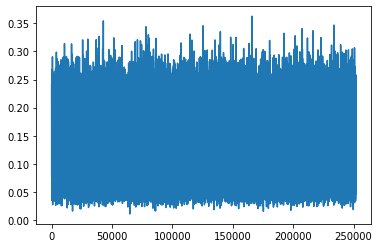

In [244]:
plt.plot(Loss_)